In [1]:
#JAI GANESH DEVA!!!OM!

In [2]:
import pandas as pd
import numpy as np
import os
import nltk
import gensim



In [3]:
os.chdir("/Users/akhilakotapati/Downloads")

In [4]:
speech=pd.read_csv("state-of-the-union.csv",header=None)

In [5]:
speech.head(1)

,0,1
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."


In [6]:
speech.columns=["year","peech"]

In [7]:
speech.head(1)

,year,peech
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."


In [8]:
speech.index=np.arange(1,len(speech)+1)

In [9]:
paddu=speech

In [10]:
paddu = paddu.sort_values(['year']).groupby(((speech.year//20)*20), sort=False).peech.apply(''.join).reset_index(name='peach')

In [418]:
speech

,year,peech
1,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
2,1790,\nState of the Union Address\nGeorge Washingto...
3,1791,\nState of the Union Address\nGeorge Washingto...
4,1792,\nState of the Union Address\nGeorge Washingto...
5,1793,\nState of the Union Address\nGeorge Washingto...
6,1794,\nState of the Union Address\nGeorge Washingto...
7,1795,\nState of the Union Address\nGeorge Washingto...
8,1796,\nState of the Union Address\nGeorge Washingto...
9,1797,\nState of the Union Address\nJohn Adams\nNove...
10,1798,\nState of the Union Address\nJohn Adams\nDece...


In [12]:
paddu=paddu.replace("\n"," ",regex=True)

In [14]:
paddu.peach=paddu.peach.astype(str).str.lower()

In [16]:
paddu["peach"] = paddu["peach"].replace("[^\w\s]"," ",regex = True)

In [18]:
paddu["peach"] = paddu["peach"].replace("\d+"," ",regex = True)

In [24]:
paddu["peach"] = paddu["peach"].replace("january|february|march|april|may|june|july|august|september|october|november|december"," ",regex = True)

In [179]:
paddu.col

,year,peach
0,1780,"[george, washington, january, fellow, citizens..."
1,1800,"[state, union, address, john, adams, november,..."
2,1820,"[state, union, address, james, monroe, novembe..."
3,1840,"[state, union, address, martin, van, buren, de..."
4,1860,"[state, union, address, james, buchanan, decem..."
5,1880,"[state, union, address, rutherford, b, hayes, ..."
6,1900,"[state, union, address, william, mckinley, dec..."
7,1920,"[state, union, address, woodrow, wilson, decem..."
8,1940,"[state, union, address, franklin, roosevelt, j..."
9,1960,"[state, union, address, dwight, eisenhower, ja..."


In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [21]:
from nltk import word_tokenize,sent_tokenize

In [22]:
import nltk.data


In [23]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


In [24]:
import nltk.data

In [25]:
paddu.peach= paddu.apply(lambda row: word_tokenize(row['peach']),axis=1)

In [29]:
from gensim.models import Word2Vec
model = Word2Vec(paddu.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)


In [30]:
print(model)

Word2Vec(vocab=22969, size=100, alpha=0.025)


In [31]:
words = list(model.wv.vocab)

In [56]:
model.save('model.bin')

In [32]:
words=list(model.wv.vocab)

In [34]:
model.most_similar('congress')

[('session', 0.9682018160820007),
 ('president', 0.9599868059158325),
 ('attention', 0.957124650478363),
 ('act', 0.9567427039146423),
 ('message', 0.9543159008026123),
 ('submitted', 0.94368577003479),
 ('january', 0.9433512687683105),
 ('passed', 0.9433251619338989),
 ('since', 0.9403414130210876),
 ('march', 0.9390206336975098)]

In [66]:
x=model[words]

In [117]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)

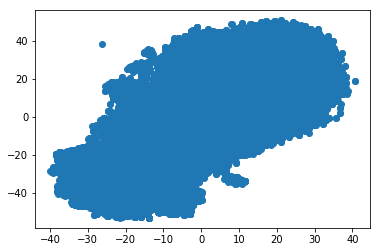

In [134]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [41]:
one=paddu.head(1)
model1 = Word2Vec(one.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model1)
words1 = list(model1.wv.vocab)


Word2Vec(vocab=3146, size=100, alpha=0.025)


In [180]:
one

,year,peach
0,1780,"[george, washington, january, fellow, citizens..."


In [349]:
model1.most_similar('war')

[('france', 0.999669075012207),
 ('country', 0.9996050000190735),
 ('may', 0.9995999336242676),
 ('necessary', 0.9995934963226318),
 ('congress', 0.9995909929275513),
 ('foreign', 0.9995574951171875),
 ('measures', 0.9995554685592651),
 ('without', 0.999552309513092),
 ('government', 0.9995418787002563),
 ('commissioners', 0.9995383024215698)]

In [378]:
u1=model1.most_similar('war')
sim1 = pd.DataFrame(u1)
sim1.columns=["words","similarity"]
sim1["year"]="1780"
sim1

,words,similarity,year
0,france,0.999669,1780
1,country,0.999605,1780
2,may,0.999600,1780
3,necessary,0.999593,1780
4,congress,0.999591,1780
5,foreign,0.999557,1780
6,measures,0.999555,1780
7,without,0.999552,1780
8,government,0.999542,1780
9,commissioners,0.999538,1780


In [70]:
two=paddu.iloc[[2]]
model2 = Word2Vec(two.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model2)
words2 = list(model2.wv.vocab)

Word2Vec(vocab=7640, size=100, alpha=0.025)


In [344]:
model2.most_similar('war')

[('may', 0.9994324445724487),
 ('government', 0.9993861317634583),
 ('parties', 0.9993712902069092),
 ('every', 0.999334454536438),
 ('powers', 0.999331533908844),
 ('power', 0.9992969036102295),
 ('object', 0.9992929697036743),
 ('effect', 0.9992858171463013),
 ('governments', 0.999259352684021),
 ('great', 0.9992251992225647)]

In [380]:
u2=model2.most_similar('war')
sim2 = pd.DataFrame(u2)
sim2.columns=["words","similarity"]
sim2["year"]="1820"
sim2

,words,similarity,year
0,may,0.999432,1820
1,government,0.999386,1820
2,parties,0.999371,1820
3,every,0.999334,1820
4,powers,0.999332,1820
5,power,0.999297,1820
6,object,0.999293,1820
7,effect,0.999286,1820
8,governments,0.999259,1820
9,great,0.999225,1820


In [72]:
two

,year,peach
2,1820,"[state, union, address, james, monroe, novembe..."


In [387]:
three=paddu.iloc[[3]]
model3 = Word2Vec(three.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model3)
words3 = list(model3.wv.vocab)

Word2Vec(vocab=8919, size=100, alpha=0.025)


In [388]:
model3.most_similar('war')

[('may', 0.9972264766693115),
 ('without', 0.9969809055328369),
 ('duties', 0.9969198703765869),
 ('thus', 0.9968333840370178),
 ('government', 0.9967082738876343),
 ('every', 0.9966098666191101),
 ('system', 0.9965204000473022),
 ('year', 0.9964922666549683),
 ('amount', 0.9964624643325806),
 ('great', 0.9964016675949097)]

In [389]:
u3=model3.most_similar('war')
sim3 = pd.DataFrame(u3)
sim3.columns=["words","similarity"]
sim3["year"]="1840"
sim3

,words,similarity,year
0,may,0.997226,1840
1,without,0.996981,1840
2,duties,0.996920,1840
3,thus,0.996833,1840
4,government,0.996708,1840
5,every,0.996610,1840
6,system,0.996520,1840
7,year,0.996492,1840
8,amount,0.996462,1840
9,great,0.996402,1840


In [390]:
four=paddu.iloc[[4]]
model4 = Word2Vec(four.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model4)
words4 = list(model4.wv.vocab)

Word2Vec(vocab=8332, size=100, alpha=0.025)


In [391]:
model4.most_similar('war')

[('labor', 0.9989897608757019),
 ('congress', 0.9989326596260071),
 ('general', 0.9989305138587952),
 ('one', 0.9989036321640015),
 ('capital', 0.9988877773284912),
 ('union', 0.9988704323768616),
 ('country', 0.9988683462142944),
 ('upon', 0.9988518953323364),
 ('without', 0.9988003969192505),
 ('may', 0.9987620115280151)]

In [392]:
u4=model4.most_similar('war')
sim4 = pd.DataFrame(u4)
sim4.columns=["words","similarity"]
sim4["year"]="1860"
sim4

,words,similarity,year
0,labor,0.998990,1860
1,congress,0.998933,1860
2,general,0.998931,1860
3,one,0.998904,1860
4,capital,0.998888,1860
5,union,0.998870,1860
6,country,0.998868,1860
7,upon,0.998852,1860
8,without,0.998800,1860
9,may,0.998762,1860


In [77]:
five=paddu.iloc[[5]]
model5 = Word2Vec(five.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model5)
words5 = list(model5.wv.vocab)

Word2Vec(vocab=10301, size=100, alpha=0.025)


In [78]:
model5.most_similar('war')

[('congress', 0.9776360988616943),
 ('may', 0.9771738052368164),
 ('territory', 0.9764466285705566),
 ('government', 0.975651204586029),
 ('country', 0.9752627611160278),
 ('foreign', 0.9750190377235413),
 ('without', 0.9750174283981323),
 ('expenditures', 0.9746002554893494),
 ('year', 0.9742997884750366),
 ('general', 0.9742975234985352)]

In [385]:
u5=model5.most_similar('war')
sim5 = pd.DataFrame(u5)
sim5.columns=["words","similarity"]
sim5["year"]="1880"
sim5

,words,similarity,year
0,congress,0.977636,1880
1,may,0.977174,1880
2,territory,0.976447,1880
3,government,0.975651,1880
4,country,0.975263,1880
5,foreign,0.975019,1880
6,without,0.975017,1880
7,expenditures,0.974600,1880
8,year,0.974300,1880
9,general,0.974298,1880


In [79]:
six=paddu.iloc[[6]]
model6 = Word2Vec(six.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model6)
words6 = list(model6.wv.vocab)

Word2Vec(vocab=11325, size=100, alpha=0.025)


In [80]:
model6.most_similar('war')

[('congress', 0.9952382445335388),
 ('may', 0.99482661485672),
 ('islands', 0.9946542978286743),
 ('year', 0.9943437576293945),
 ('government', 0.9940354824066162),
 ('president', 0.9939664006233215),
 ('people', 0.9939447641372681),
 ('public', 0.9936366677284241),
 ('service', 0.9934700727462769),
 ('commission', 0.9933823943138123)]

In [394]:
u6=model6.most_similar('war')
sim6 = pd.DataFrame(u6)
sim6.columns=["words","similarity"]
sim6["year"]="1900"
sim6

,words,similarity,year
0,congress,0.995238,1900
1,may,0.994827,1900
2,islands,0.994654,1900
3,year,0.994344,1900
4,government,0.994035,1900
5,president,0.993966,1900
6,people,0.993945,1900
7,public,0.993637,1900
8,service,0.993470,1900
9,commission,0.993382,1900


In [81]:
seven=paddu.iloc[[7]]
model7 = Word2Vec(seven.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model7)
words7 = list(model7.wv.vocab)

Word2Vec(vocab=7058, size=100, alpha=0.025)


In [351]:
model7.most_similar('war')

[('must', 0.9986203908920288),
 ('government', 0.9984880685806274),
 ('law', 0.9982452988624573),
 ('necessary', 0.9982070326805115),
 ('may', 0.9981900453567505),
 ('public', 0.9981594085693359),
 ('great', 0.9981381893157959),
 ('would', 0.9980737566947937),
 ('much', 0.9980257749557495),
 ('power', 0.9980202913284302)]

In [395]:
u7=model7.most_similar('war')
sim7 = pd.DataFrame(u9)
sim7.columns=["words","similarity"]
sim7["year"]="1920"
sim7

,words,similarity,year
0,imposed,0.356343,1920
1,wind,0.354863,1920
2,functional,0.328458,1920
3,stirring,0.322756,1920
4,unchecked,0.319501,1920
5,exceptions,0.311608,1920
6,senseless,0.309206,1920
7,adoption,0.308637,1920
8,engrave,0.308178,1920
9,crossed,0.306231,1920


In [83]:
eight=paddu.iloc[[8]]
model8 = Word2Vec(eight.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model8)
words8 = list(model8.wv.vocab)

Word2Vec(vocab=7555, size=100, alpha=0.025)


In [353]:
model8.wv.most_similar('war')

[('japanese', 0.9997966289520264),
 ('forces', 0.9997556805610657),
 ('islands', 0.9997278451919556),
 ('one', 0.9997223019599915),
 ('china', 0.9997180104255676),
 ('air', 0.9997107982635498),
 ('men', 0.9996920824050903),
 ('sea', 0.9996901154518127),
 ('us', 0.9996744394302368),
 ('could', 0.9996721744537354)]

In [397]:
u8=model8.most_similar('war')
sim8 = pd.DataFrame(u8)
sim8.columns=["words","similarity"]
sim8["year"]="1940"
sim8

,words,similarity,year
0,japanese,0.999797,1940
1,forces,0.999756,1940
2,islands,0.999728,1940
3,one,0.999722,1940
4,china,0.999718,1940
5,air,0.999711,1940
6,men,0.999692,1940
7,sea,0.999690,1940
8,us,0.999674,1940
9,could,0.999672,1940


In [85]:
nine=paddu.iloc[[9]]
model9 = Word2Vec(nine.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model9)
words9 = list(model9.wv.vocab)

Word2Vec(vocab=6816, size=100, alpha=0.025)


In [354]:
model9.wv.most_similar('terrorism')

[('imposed', 0.35634279251098633),
 ('wind', 0.35486340522766113),
 ('functional', 0.3284575045108795),
 ('stirring', 0.32275551557540894),
 ('unchecked', 0.3195006847381592),
 ('exceptions', 0.3116079568862915),
 ('senseless', 0.3092063367366791),
 ('adoption', 0.3086368441581726),
 ('engrave', 0.30817753076553345),
 ('crossed', 0.306230753660202)]

In [398]:
u9=model9.most_similar('terrorism')
ter1960 = pd.DataFrame(u9)
ter1960.columns=["words","similarity"]
ter1960["year"]="1960"
ter1960

,words,similarity,year
0,imposed,0.356343,1960
1,wind,0.354863,1960
2,functional,0.328458,1960
3,stirring,0.322756,1960
4,unchecked,0.319501,1960
5,exceptions,0.311608,1960
6,senseless,0.309206,1960
7,adoption,0.308637,1960
8,engrave,0.308178,1960
9,crossed,0.306231,1960


In [399]:
u9=model9.most_similar('terrorism')
sim9 = pd.DataFrame(u9)
sim9.columns=["words","similarity"]
sim9["year"]="1960"
sim9

,words,similarity,year
0,imposed,0.356343,1960
1,wind,0.354863,1960
2,functional,0.328458,1960
3,stirring,0.322756,1960
4,unchecked,0.319501,1960
5,exceptions,0.311608,1960
6,senseless,0.309206,1960
7,adoption,0.308637,1960
8,engrave,0.308178,1960
9,crossed,0.306231,1960


In [87]:
ten=paddu.iloc[[10]]
model10 = Word2Vec(ten.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model10)
words10 = list(model10.wv.vocab)

Word2Vec(vocab=8218, size=100, alpha=0.025)


In [355]:
model10.wv.most_similar('terrorism')

[('adoption', 0.7671973705291748),
 ('grain', 0.7658168077468872),
 ('assurance', 0.7655997276306152),
 ('certificates', 0.7647886276245117),
 ('pursuant', 0.7601293325424194),
 ('weak', 0.7596339583396912),
 ('combined', 0.7592002749443054),
 ('recognizing', 0.7587597370147705),
 ('pursuit', 0.7584208846092224),
 ('imposed', 0.757532000541687)]

In [401]:
u10=model10.most_similar('terrorism')
terror1980 = pd.DataFrame(u10)
terror1980.columns=["words","similarity"]
terror1980["year"]="1980"
terror1980

,words,similarity,year
0,adoption,0.767197,1980
1,grain,0.765817,1980
2,assurance,0.765600,1980
3,certificates,0.764789,1980
4,pursuant,0.760129,1980
5,weak,0.759634,1980
6,combined,0.759200,1980
7,recognizing,0.758760,1980
8,pursuit,0.758421,1980
9,imposed,0.757532,1980


In [400]:
u10=model10.most_similar('war')
sim10 = pd.DataFrame(u10)
sim10.columns=["words","similarity"]
sim10["year"]="1980"
sim10

,words,similarity,year
0,congress,0.999247,1980
1,assure,0.999216,1980
2,increased,0.999189,1980
3,housing,0.999168,1980
4,urban,0.999167,1980
5,women,0.999147,1980
6,program,0.999146,1980
7,also,0.999145,1980
8,provide,0.999133,1980
9,economic,0.999132,1980


In [90]:
eleven=paddu.iloc[[11]]
model11 = Word2Vec(eleven.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model11)
words11 = list(model11.wv.vocab)

Word2Vec(vocab=6160, size=100, alpha=0.025)


In [340]:
model11.most_similar('terrorism')

[('yet', 0.9969432353973389),
 ('congress', 0.9968900680541992),
 ('terrorists', 0.9968175292015076),
 ('ask', 0.9967942237854004),
 ('war', 0.9967775940895081),
 ('year', 0.9966838955879211),
 ('economy', 0.9966829419136047),
 ('great', 0.9966686964035034),
 ('us', 0.9966652393341064),
 ('america', 0.9966627955436707)]

In [404]:
u11=model11.most_similar('war')
sim11 = pd.DataFrame(u11)
sim11.columns=["words","similarity"]
sim11["year"]="1980"
sim11

,words,similarity,year
0,america,0.999604,1980
1,freedom,0.999533,1980
2,country,0.999488,1980
3,every,0.999473,1980
4,economy,0.999469,1980
5,citizens,0.999459,1980
6,must,0.999454,1980
7,american,0.999453,1980
8,congress,0.999444,1980
9,work,0.999440,1980


In [356]:
u11=model11.most_similar('terrorism')

In [357]:
sim11 = pd.DataFrame(u11)

In [358]:
sim11.columns=["words","similarity"]

In [359]:
sim11["year"]="2000"

In [403]:
terror2000=sim11
terror2000

,words,similarity,year
0,yet,0.996943,2000
1,congress,0.996890,2000
2,terrorists,0.996818,2000
3,ask,0.996794,2000
4,war,0.996778,2000
5,year,0.996684,2000
6,economy,0.996683,2000
7,great,0.996669,2000
8,us,0.996665,2000
9,america,0.996663,2000


In [181]:
twelve=paddu.iloc[[1]]
model12 = Word2Vec(twelve.peach, size=100, window=5, min_count=1, workers=4,hs=0,negative=5,sg=1)
print(model12)
words12 = list(model12.wv.vocab)

Word2Vec(vocab=4896, size=100, alpha=0.025)


In [405]:

#sim12 = pd.DataFrame()
#sim12.columns=["words","similarity"]
#sim12["words"]=""
#sim12["similarity"]=""
u12=model12.most_similar('war')
sim12 = pd.DataFrame(u12)
sim12.columns=["words","similarity"]
sim12["year"]="1800"
sim12

,words,similarity,year
0,may,0.998858,1800
1,us,0.998789,1800
2,congress,0.998762,1800
3,peace,0.998646,1800
4,character,0.998643,1800
5,necessary,0.998642,1800
6,could,0.998642,1800
7,present,0.998602,1800
8,shall,0.998601,1800
9,law,0.998587,1800


In [406]:
war_change = pd.concat([sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,sim11,sim12])


,words,similarity,year
0,france,0.999669,1780
1,country,0.999605,1780
2,may,0.999600,1780
3,necessary,0.999593,1780
4,congress,0.999591,1780
5,foreign,0.999557,1780
6,measures,0.999555,1780
7,without,0.999552,1780
8,government,0.999542,1780
9,commissioners,0.999538,1780


In [407]:
war_change.index = np.arange(1 , len(war_change)+1)

In [412]:
war_change.to_csv("starwars.csv")

In [411]:
war_change["similarity"]= war_change["similarity"]*1000

In [415]:
terri=pd.concat([ter1960,terror1980,terror2000])

In [416]:
terri.index = np.arange(1 , len(terri)+1)

In [417]:
terri.to_csv("tur.csv")

In [100]:
a=model1[words1]
from sklearn.cluster import KMeans


num_clusters =40
# Initalize a k-means object and use it to extract centroids
kmeans1 = KMeans( n_clusters = num_clusters )
idx1 = kmeans1.fit_predict(a)

index2word1 =[]
for i in range(0,len(words1)):
    index2word1.append(words1[i])
                                                                                           
word_centroid_map1 = dict(zip(index2word1, idx1 ))

# For the first 10 clusters
for cluster in range(0,num_clusters):
    
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    
    # Find all of the words for that cluster number, and print them out
    wordi = []
    for i in range(0,len(word_centroid_map1)):
        if( word_centroid_map1[list(word_centroid_map1)[i]] == cluster ):
            wordi.append(list(word_centroid_map1)[i])
    print(wordi)


Cluster 0
['derive', 'digested', 'promote', 'mature', 'comprehending', 'conducive', 'fund', 'giving', 'impressions', 'aids', 'university', 'endeavors', 'task', 'feel', 'calculations', 'discharging', 'advantage', 'kentucky', 'conducted', 'concern', 'incursions', 'impunity', 'overtures', 'captivity', 'unknown', 'founded', 'reflections', 'moments', 'carry', 'leaves', 'allow', 'moreover', 'favorite', 'appropriation', 'along', 'reduction', 'guidance', 'stability', 'disclosed', 'bank', 'provisionally', 'used', 'convince', 'consistently', 'depending', 'belonging', 'coercion', 'cease', 'imposition', 'experiments', 'civilization', 'readily', 'misconception', 'evidence', 'favored', 'assurance', 'charges', 'limited', 'greatest', 'supersede', 'solid', 'apparatus', 'applied', 'contest', 'forward', 'victims', 'symptoms', 'throughout', 'eligible', 'extortion', 'obedience', 'court', 'expiration', 'beginning', 'represented', 'lieu', 'durable', 'cultivation', 'commencement', 'real', 'suspicions', 'deli

['present', 'information', 'good', 'last', 'proper', 'would', 'nations', 'nothing', 'every', 'honor', 'directed', 'act', 'subjects', 'nation', 'given', 'philadelphia']

Cluster 10
['still', 'providence', 'many', 'objects', 'attention', 'interest', 'respect', 'new', 'provision', 'resources', 'proceed', 'militia', 'yet', 'view', 'ensuing', 'question', 'republic', 'required', 'britain', 'britannic', 'commissioner', 'london']

Cluster 11
['tend', 'entitled', 'papers', 'parts', 'nature', 'manufactures', 'administration', 'society', 'mercantile', 'completed', 'holland', 'concurred', 'sentiments', 'expressed', 'crimes', 'seduced', 'hostilities', 'preparations', 'unite', 'express', 'legislative', 'punishment', 'opposition', 'experience', 'explanations', 'sides', 'except', 'enough', 'views', 'recall', 'connection', 'liberal', 'increased', 'continuation', 'understood', 'failure', 'energy', 'maintain', 'maintenance', 'relates', 'inestimable', 'fulfillment', 'stores', 'leave', 'moment', 'establish

['presents', 'eminent', 'resuming', 'comfortable', 'aggressors', 'admitted', 'naturalization', 'inventions', 'promotion', 'surest', 'specify', 'convey', 'witnessed', 'rise', 'allotted', 'directions', 'warm', 'aided', 'issuing', 'christian', 'standards', 'sufficiency', 'infringe', 'rewarded', 'contributed', 'sum', 'specially', 'wavering', 'dictates', 'concerning', 'alienations', 'penalties', 'corresponding', 'philanthropy', 'laying', 'yields', 'apprehensions', 'georgetown', 'rate', 'census', 'foot', 'substantially', 'casualties', 'fortification', 'hazards', 'facility', 'serves', 'disorders', 'strongly', 'invariable', 'procure', 'detail', 'despaired', 'happened', 'emissaries', 'considered', 'south', 'tennessee', 'tribe', 'vicinity', 'alternative', 'prosecution', 'immature', 'consolation', 'wants', 'intimated', 'lessening', 'unlawful', 'obstruct', 'announcing', 'infractors', 'bail', 'supplementary', 'putting', 'regulation', 'money', 'transmission', 'arises', 'matured', 'section', 'saving'

['received', 'general', 'one', 'indians', 'direct', 'whether', 'sea', 'faith', 'expected', 'seat', 'river', 'captures', 'sincere', 'croix', 'bay']

Cluster 28
['embrace', 'congratulating', 'accession', 'carolina', 'concord', 'reach', 'cool', 'disciplined', 'manufactories', 'facilitated', 'appointments', 'defraying', 'introduction', 'agree', 'literature', 'convincing', 'intrusted', 'teaching', 'disregard', 'resulting', 'licentiousness', 'cherishing', 'encroachments', 'inviolable', 'saw', 'expressive', 'devise', 'cheerful', 'obviously', 'cares', 'insuring', 'assures', 'bears', 'exemplary', 'provisional', 'previously', 'filled', 'propositions', 'distinct', 'transaction', 'emboldened', 'retreat', 'alacrity', 'sacrificed', 'shocking', 'provocations', 'drafts', 'thankful', 'reminds', 'overlook', 'abridge', 'enhance', 'transporting', 'markets', 'contingencies', 'bottoms', 'guarding', 'doors', 'residence', 'appropriated', 'stands', 'funded', 'fast', 'exonerate', 'explains', 'salutary', 'undimi

['washington', 'fellow', 'blessings', 'course', 'particular', 'importance', 'tribes', 'interests', 'place', 'former', 'europe', 'expense', 'countries', 'full', 'numerous', 'removed', 'order', 'extent', 'like', 'accomplished', 'proportion', 'proceedings', 'posts', 'gratitude', 'although', 'sustained', 'sums', 'conclusion', 'decision', 'spanish', 'determination']

Cluster 36
['wisdom', 'safety', 'establishment', 'officers', 'due', 'reason', 'protection', 'legislature', 'engagements', 'consequence', 'late', 'called', 'therefore', 'result', 'two', 'together', 'ascertain', 'judicial', 'civil', 'insure', 'intended', 'obstacles', 'expenditure']

Cluster 37
['important', 'circumstances', 'prosperity', 'well', 'essential', 'troops', 'consideration', 'certain', 'also', 'expedient', 'terms', 'object', 'opinion', 'authority', 'address', 'much', 'situation', 'navigation', 'trade', 'business', 'disposition', 'service', 'property', 'world', 'spain']

Cluster 38
['credit', 'exertion', 'render', 'conci

In [105]:
luck1 = pd.DataFrame(list(word_centroid_map1.items()) , columns=['vord1','kluster1'])

luck1["year1"]=""

In [320]:
a

array([[ -8.06596968e-03,   1.84603985e-02,   1.61791835e-02, ...,
          1.43359127e-02,   1.96949970e-02,   2.31714677e-02],
       [ -4.40856442e-02,   5.42471521e-02,   4.43605371e-02, ...,
          6.10464700e-02,   6.23489916e-02,   6.35588095e-02],
       [ -1.24484850e-02,   1.52306287e-02,   9.01741255e-03, ...,
          1.38034010e-02,   1.82180237e-02,   2.14835983e-02],
       ..., 
       [ -2.43488979e-03,  -2.59098969e-03,   8.65460548e-04, ...,
         -4.97863721e-03,   1.33996087e-04,   2.04290147e-03],
       [  4.15644143e-03,   4.99538262e-04,   4.66675498e-04, ...,
         -4.66984371e-03,  -1.43559871e-03,  -1.93281041e-03],
       [  3.32247769e-03,   4.88885771e-03,  -1.41080905e-04, ...,
         -2.60966155e-03,  -9.53871422e-05,  -2.06339103e-03]], dtype=float32)

In [118]:

tsne = TSNE(n_components=2)
X_tsne1 = tsne.fit_transform(a)



NameError: name 'X_tsne' is not defined

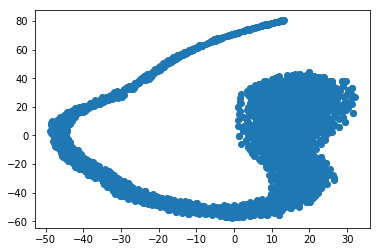

In [119]:
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1])
plt.show()

In [121]:
X_tsne1

array([[-28.06131363, -44.18370819],
       [-16.25528908,  55.02483368],
       [-15.68328094, -50.36497879],
       ..., 
       [ 17.4057579 ,  41.88529587],
       [ 18.5326767 ,  41.27673721],
       [ 16.52687263,  41.3382988 ]], dtype=float32)

In [131]:
type(model1.wv.vocab)

dict

In [140]:
points1 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne1[model1.wv.vocab[word].index])
            for word in model1.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [159]:
points1["period"]="1780"
points1

,word,x,y,period
0,george,-44.657753,9.971659,1780
1,washington,24.647667,26.984303,1780
2,january,-43.846451,-17.860426,1780
3,fellow,15.422767,28.394400,1780
4,citizens,7.535870,77.422874,1780
5,senate,-36.909546,-24.589148,1780
6,house,10.969140,79.066193,1780
7,representatives,-33.099228,26.418621,1780
8,embrace,-31.959496,-32.743095,1780
9,great,10.194274,78.603897,1780


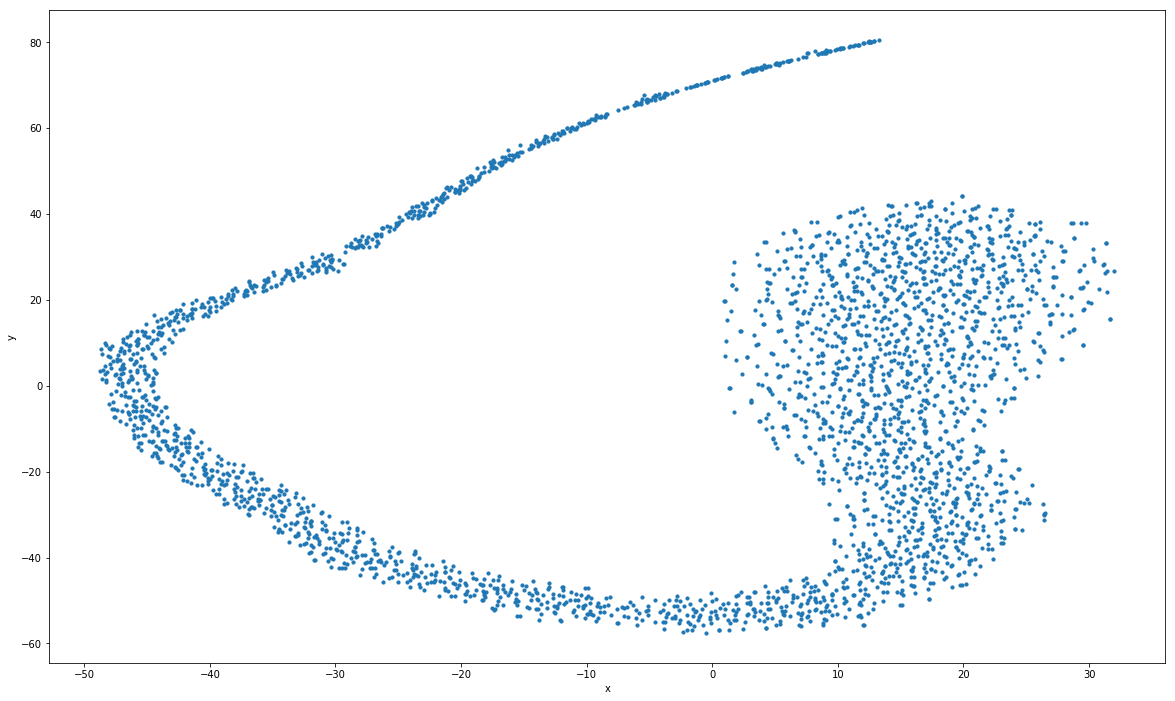

In [139]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

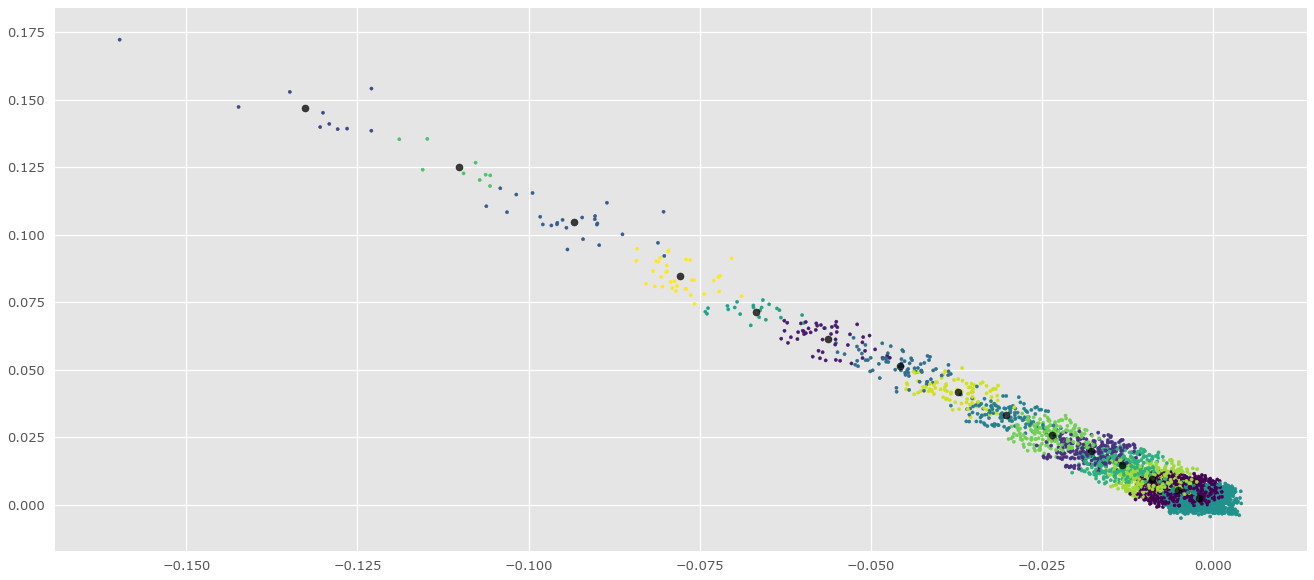

In [324]:
kmeans1 = KMeans(n_clusters=15)
kmeans1.fit(a)
y_kmeans1 = kmeans1.predict(a)

plt.scatter(a[:, 0], a[:, 1], c=y_kmeans1, s=10, cmap='viridis')

centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=50, alpha=0.75);

In [142]:
b=model2[words2]

tsne2 = TSNE(n_components=2)
X_tsne2 = tsne2.fit_transform(b)


In [143]:
points2 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne2[model2.wv.vocab[word].index])
            for word in model2.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [1]:
kmeans2 = KMeans(n_clusters=15)
kmeans1.fit(X_tsne2)
y_kmeans2 = kmeans1.predict(X_tsne2)

plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y_kmeans2, s=10, cmap='viridis')



NameError: name 'KMeans' is not defined

In [187]:
points2["period"]="1820"


In [144]:
c=model3[words3]

tsne3 = TSNE(n_components=2)
X_tsne3 = tsne3.fit_transform(c)

In [145]:
points3 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne3[model3.wv.vocab[word].index])
            for word in model3.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [188]:
points3["period"]="1840"


In [146]:
d=model4[words4]

tsne4 = TSNE(n_components=2)
X_tsne4 = tsne4.fit_transform(d)

In [147]:
points4 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne4[model4.wv.vocab[word].index])
            for word in model4.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [189]:
points4["period"]="1860"


In [148]:
e=model5[words5]

tsne5 = TSNE(n_components=2)
X_tsne5 = tsne5.fit_transform(e)

In [150]:
points5 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne5[model5.wv.vocab[word].index])
            for word in model5.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [190]:
points5["period"]="1880"


In [151]:
f=model6[words6]

tsne6 = TSNE(n_components=2)
X_tsne6 = tsne6.fit_transform(f)

In [152]:
points6 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne6[model6.wv.vocab[word].index])
            for word in model6.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [191]:
points6["period"]="1900"


In [153]:
g=model7[words7]

tsne7 = TSNE(n_components=2)
X_tsne7 = tsne7.fit_transform(g)

In [154]:
points7 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne7[model7.wv.vocab[word].index])
            for word in model7.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [192]:
points7["period"]="1920"


In [155]:
h=model8[words8]

tsne8 = TSNE(n_components=2)
X_tsne8 = tsne8.fit_transform(h)

In [156]:
points8 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne8[model8.wv.vocab[word].index])
            for word in model8.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [193]:
points8["period"]="1940"


In [157]:
i=model9[words9]

tsne9 = TSNE(n_components=2)
X_tsne9 = tsne9.fit_transform(i)

In [160]:
points9 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne9[model9.wv.vocab[word].index])
            for word in model9.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [194]:
points9["period"]="1960"


In [161]:
j=model10[words10]

tsne10 = TSNE(n_components=2)
X_tsne10 = tsne10.fit_transform(j)

In [162]:
points10 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne6[model10.wv.vocab[word].index])
            for word in model10.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [195]:
points10["period"]="1980"


In [163]:
k=model11[words11]

tsne11 = TSNE(n_components=2)
X_tsne11 = tsne11.fit_transform(k)

In [175]:
points11 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne11[model11.wv.vocab[word].index])
            for word in model11.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [196]:
points11["period"]="2000"


In [184]:
l=model12[words12]

tsne12 = TSNE(n_components=2)
X_tsne12 = tsne12.fit_transform(l)

In [185]:
points12 = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, X_tsne12[model12.wv.vocab[word].index])
            for word in model12.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [186]:
points12["period"]="1800"

In [201]:
final = pd.concat([points1,points2,points3,points4,points5,points6,points7,points8,points9,points10,points11,points12])

In [219]:
final.index = np.arange(1 , len(final)+1)

In [214]:
lit = ["congress","trump","military","economy","employment","women"]

In [231]:
plot=[]
j=1
for i in range(1,len(final)+1):
    if final.word[i] in lit :
        plot.append(final.ix[i,:])
        j = j + 1

In [223]:
final.word[125]

'military'

In [230]:
final.ix[1,:]

word       george
x        -44.6578
y         9.97166
period       1780
Name: 1, dtype: object

In [236]:
plot = pd.DataFrame(plot)

In [237]:
plot.index = np.arange(1,len(plot)+1)

In [240]:
plot.to_csv("Clusters.csv")

In [410]:
war_change.to_csv("war.csv")

In [243]:
viz = plot

In [259]:
#viz["value"] = viz["word"].map(str) + viz["period"]
viz['id']=""
for i in range(1,len(viz)+1):
    if ( viz.word[i] == 'military'):
        viz.id[i] = 1
    if ( viz.word[i] == 'economy'):
        viz.id[i] = 2
    if ( viz.word[i] == 'congress'):
        viz.id[i] = 3
    if ( viz.word[i] == 'women'):
        viz.id[i] = 4
    if ( viz.word[i] == 'employment'):
        viz.id[i] = 5
        
        

/Users/akhilakotapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/akhilakotapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/akhilakotapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/akhilakotapati/anaconda3/lib/python3.6/site-pack

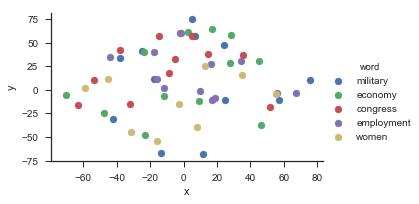

In [288]:
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=viz, hue='word', aspect=1.61)

fg.map(plt.scatter, 'x', 'y').add_legend()

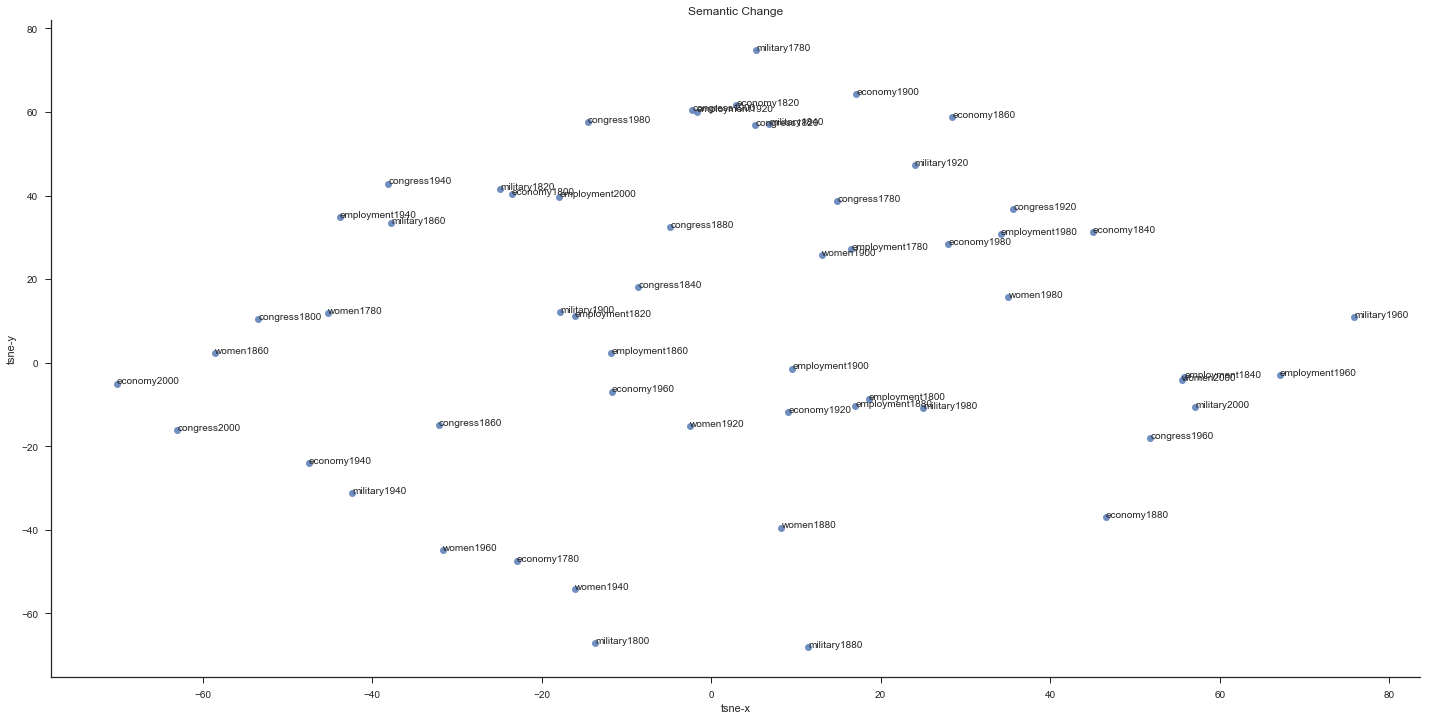

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

 

ax = sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=viz, # Data source
           fit_reg=False, # Don't fix a regression line
           size = 10,
           aspect =2 ) # size and dimension

plt.title('Semantic Change')
# Set x-axis label
plt.xlabel('tsne-x')
# Set y-axis label
plt.ylabel('tsne-y')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(viz.x, viz.y, viz.value, plt.gca())  


In [318]:
plt.style.use("ggplot")

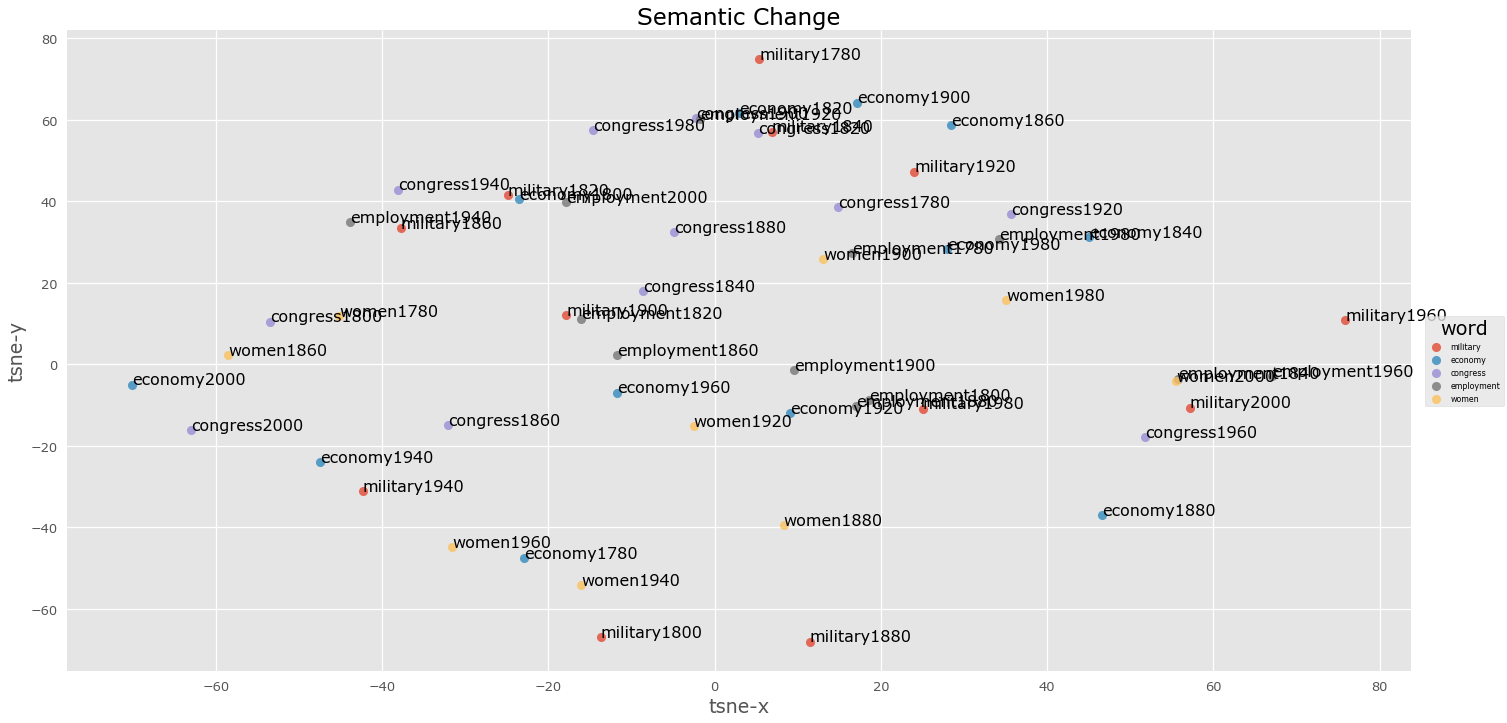

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

 
plt.rcParams["font.family"] = "Verdana"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = 20,10


ax = sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=viz, # Data source
           fit_reg=False, # Don't fix a regression line
           size = 10,
           hue = "word",
           aspect =2 ) # size and dimension

plt.title('Semantic Change')
# Set x-axis label
plt.xlabel('tsne-x')
# Set y-axis label
plt.ylabel('tsne-y')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(viz.x, viz.y, viz.value, plt.gca())

